In [63]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.

# replaced with my dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [4]:
print(df.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop('Unnamed: 32', axis=1, inplace=True)

#data set should be clean now that was the only column missing anything

37.25834797891037%


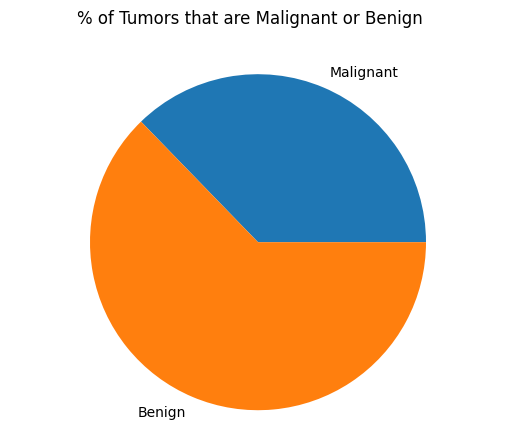

In [34]:
# Q1
malignant = df[df['diagnosis'] == 'M']
m_count = malignant.size
benign = df[df['diagnosis'] == 'B']
b_count = benign.size
print(f'{m_count * 100 / (m_count + b_count)}%')

plt.pie([m_count, b_count], labels=['Malignant', 'Benign'])
plt.axis('equal')
plt.suptitle('% of Tumors that are Malignant or Benign')
plt.show()

malignant: 17.462830188679245 um
benign: 12.146523809523808 um


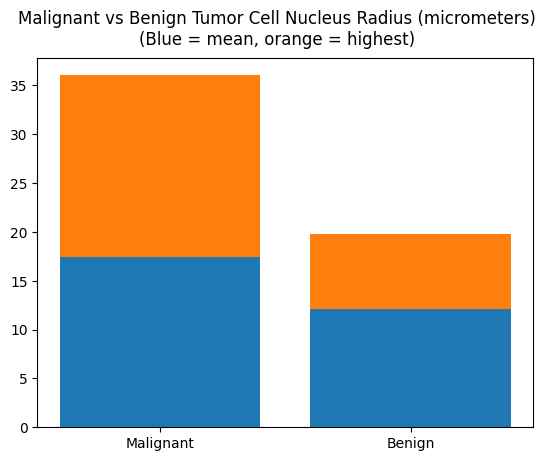

In [ ]:
# Q2
m_mean_nucleus_radius = malignant['radius_mean'].mean()
b_mean_nucleus_radius = benign['radius_mean'].mean()
print(f'malignant: {m_mean_nucleus_radius} um')
print(f'benign: {b_mean_nucleus_radius} um')
# i assume this is micro meters as its a nucleus

# moved here from a lower cell for graphing reasons

m_worst_radius = malignant['radius_worst'].max()
b_worst_radius = benign['radius_worst'].max()



###

plt.bar(data = [m_mean_nucleus_radius, b_mean_nucleus_radius],
        x = ['Malignant', 'Benign'],
        height = [m_mean_nucleus_radius, b_mean_nucleus_radius])
plt.bar(data = [m_worst_radius, b_worst_radius],
        x = ['Malignant', 'Benign'],
        height = [m_worst_radius - m_mean_nucleus_radius, b_worst_radius - b_mean_nucleus_radius],
        bottom = [m_mean_nucleus_radius, b_mean_nucleus_radius])
plt.suptitle('Malignant vs Benign Tumor Cell Nucleus Radius (micrometers)\n(Blue = mean, orange = highest)')
plt.show()

malignant: 0.1929089622641509
benign: 0.1741859943977591
malignant: 0.6638
benign: 0.4228


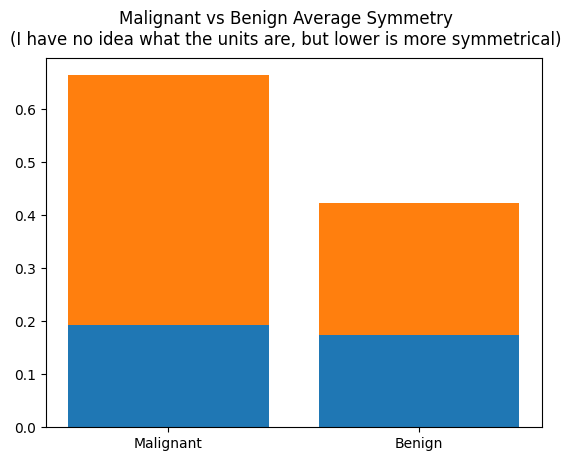

In [55]:
# q3
m_mean_symmetry = malignant['symmetry_mean'].mean()
b_mean_symmetry = benign['symmetry_mean'].mean()
print(f'malignant: {m_mean_symmetry}')
print(f'benign: {b_mean_symmetry}')

m_worst_symmetry = malignant['symmetry_worst'].max()
b_worst_symmetry = benign['symmetry_worst'].max()
print(f'malignant: {m_worst_symmetry}')
print(f'benign: {b_worst_symmetry}')

plt.bar(x = ['Malignant', 'Benign'],
        height = [m_mean_symmetry, b_mean_symmetry])
plt.bar(height = [m_worst_symmetry - m_mean_symmetry, b_worst_symmetry - b_mean_symmetry],
        bottom = [m_mean_symmetry, b_mean_symmetry],
        x = ['Malignant', 'Benign'])
plt.suptitle('Malignant vs Benign Average Symmetry\n(I have no idea what the units are, but lower is more symmetrical)')
plt.show()

malignant: 0.10289849056603775
benign: 0.09247764705882354
malignant: 0.2226
benign: 0.2006


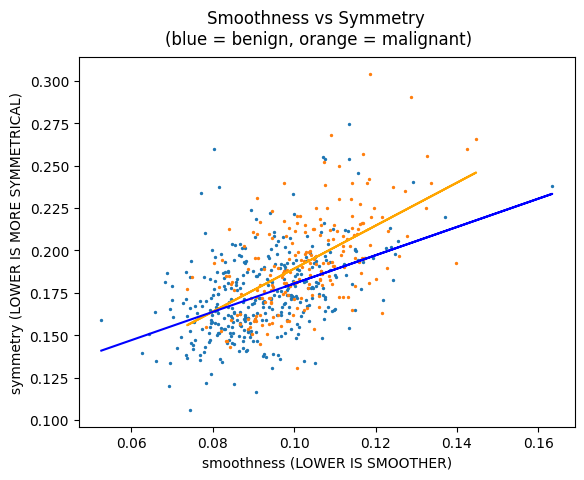

In [76]:
# q4
m_mean_smoothness = malignant['smoothness_mean'].mean()
b_mean_smoothness = benign['smoothness_mean'].mean()
print(f'malignant: {m_mean_smoothness}')
print(f'benign: {b_mean_smoothness}')
# smoothness defined as local variation in radius length so i assume
# a lower value is more smooth

m_worst_smoothness = malignant['smoothness_worst'].max()
b_worst_smoothness = benign['smoothness_worst'].max()
print(f'malignant: {m_worst_smoothness}')
print(f'benign: {b_worst_smoothness}')

"""plt.bar(x = ['Malignant', 'Benign'],
        height = [m_mean_smoothness, b_mean_smoothness])
plt.bar(x = ['Malignant', 'Benign'],
        height = [m_worst_smoothness - m_mean_smoothness, b_worst_smoothness - b_mean_smoothness],
        bottom = [m_mean_smoothness, b_mean_smoothness])
plt.suptitle('Malignant vs Benign Smoothness \n(local variation of radius lengths in micrometers) \n(lower is better)')
plt.show()
"""

m1, b1 = np.polyfit(malignant['smoothness_mean'], malignant['symmetry_mean'], 1)
y1 = m1 * malignant['smoothness_mean'] + b1

m2, b2 = np.polyfit(benign['smoothness_mean'], benign['symmetry_mean'], 1)
y2 = m2 * benign['smoothness_mean'] + b2
plt.scatter(x = benign['smoothness_mean'],
            y = benign['symmetry_mean'],
            s = 2)
plt.scatter(x = malignant['smoothness_mean'],
            y = malignant['symmetry_mean'],
            s = 2)
plt.plot(malignant['smoothness_mean'], y1, color='orange')
plt.plot(benign['smoothness_mean'], y2, color='blue')
plt.xlabel('smoothness (LOWER IS SMOOTHER)')
plt.ylabel('symmetry (LOWER IS MORE SYMMETRICAL)')
plt.suptitle('Smoothness vs Symmetry \n(blue = benign, orange = malignant)')
plt.show()

malignant: 21.60490566037736
benign: 17.914761904761903


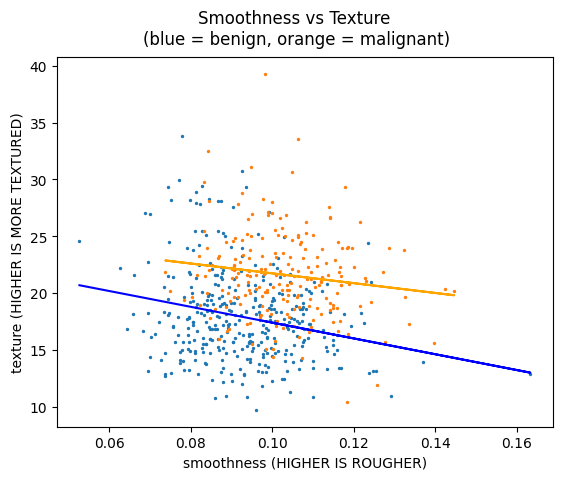

In [73]:
# q5
m_mean_texture = malignant['texture_mean'].mean()
b_mean_texture = benign['texture_mean'].mean()
print(f'malignant: {m_mean_texture}')
print(f'benign: {b_mean_texture}')
# texture = "standard deviation of grayscale values" = how different the
# pixels in the image look ~= some parts of the tumor being further
# or closer to the "camera" making them darker/lighter = the tumor
# being more rough and "textured"

m1, b1 = np.polyfit(malignant['smoothness_mean'], malignant['texture_mean'], 1)
y1 = m1 * malignant['smoothness_mean'] + b1

m2, b2 = np.polyfit(benign['smoothness_mean'], benign['texture_mean'], 1)
y2 = m2 * benign['smoothness_mean'] + b2
plt.scatter(x = benign['smoothness_mean'],
            y = benign['texture_mean'],
            s = 2)
plt.scatter(x = malignant['smoothness_mean'],
            y = malignant['texture_mean'],
            s = 2)
plt.plot(malignant['smoothness_mean'], y1, color='orange')
plt.plot(benign['smoothness_mean'], y2, color='blue')
plt.xlabel('smoothness (HIGHER IS ROUGHER)')
plt.ylabel('texture (HIGHER IS MORE TEXTURED)')
plt.suptitle('Smoothness vs Texture \n(blue = benign, orange = malignant)')
plt.show()

In [43]:
# q6
"""m_worst_radius = malignant['radius_worst'].mean()
b_worst_radius = benign['radius_worst'].mean()"""
# these were moved to an above cell for graphing purposes
print(f'malignant: {m_worst_radius}')
print(f'benign: {b_worst_radius}')

malignant: 36.04
benign: 19.82


malignant: 0.08799
benign: 0.025717406162464984
malignant: 0.16077471698113208
benign: 0.04605762100840336


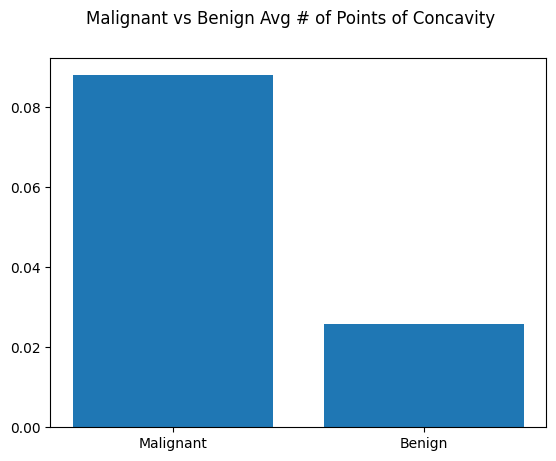

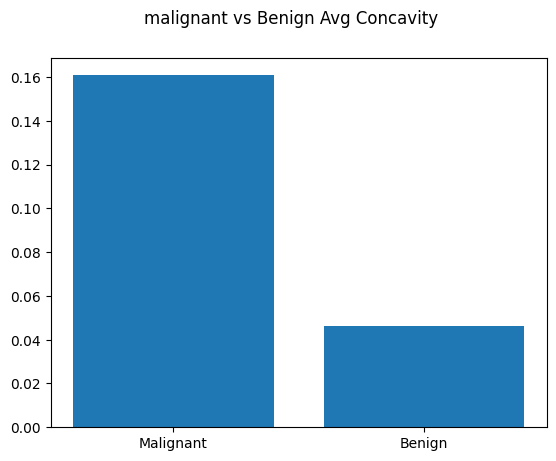

In [79]:
# q7
m_mean_concave_points = malignant['concave points_mean'].mean()
b_mean_concave_points = benign['concave points_mean'].mean()
print(f'malignant: {m_mean_concave_points}')
print(f'benign: {b_mean_concave_points}')

m_mean_concavity = malignant['concavity_mean'].mean()
b_mean_concavity = benign['concavity_mean'].mean()
print(f'malignant: {m_mean_concavity}')
print(f'benign: {b_mean_concavity}')

plt.bar(x = ['Malignant', 'Benign'],
        height = [m_mean_concave_points, b_mean_concave_points])
plt.suptitle('Malignant vs Benign Avg # of Points of Concavity')
plt.show()

plt.bar(x = ['Malignant', 'Benign'],
        height = [m_mean_concavity, b_mean_concavity])
plt.suptitle('malignant vs Benign Avg Concavity')
plt.show()

malignant: 0.06268009433962264
benign: 0.0628673949579832
malignant: 0.2075
benign: 0.1486
malignant: 0.0040624056603773585
benign: 0.0036360512605042015


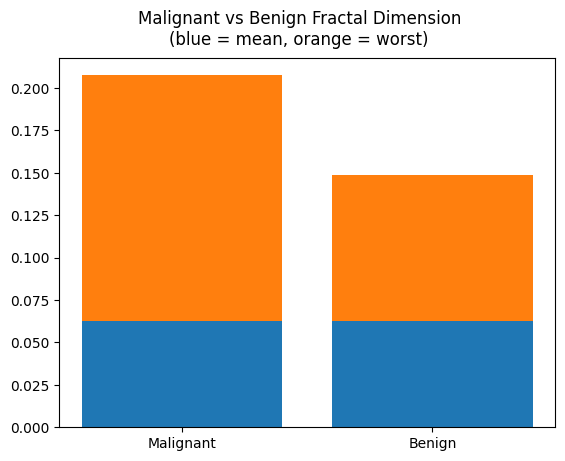

In [82]:
# q8
m_mean_fractal = malignant['fractal_dimension_mean'].mean()
b_mean_fractal = benign['fractal_dimension_mean'].mean()
print(f'malignant: {m_mean_fractal}')
print(f'benign: {b_mean_fractal}')

m_worst_fractal = malignant['fractal_dimension_worst'].max()
b_worst_fractal = benign['fractal_dimension_worst'].max()
print(f'malignant: {m_worst_fractal}')
print(f'benign: {b_worst_fractal}')

m_se_fractal = malignant['fractal_dimension_se'].mean()
b_se_fractal = benign['fractal_dimension_se'].mean()
print(f'malignant: {m_se_fractal}')
print(f'benign: {b_se_fractal}')

plt.bar(x = ['Malignant', 'Benign'],
        height = [m_mean_fractal, b_mean_fractal])
plt.bar(x = ['Malignant', 'Benign'],
        height = [m_worst_fractal - m_mean_fractal, b_worst_fractal - b_mean_fractal],
        bottom = [m_mean_fractal, b_mean_fractal])
plt.suptitle('Malignant vs Benign Fractal Dimension\n(blue = mean, orange = worst)')
plt.show()

malignant: 1.2109146226415093
benign: 1.2203801120448179


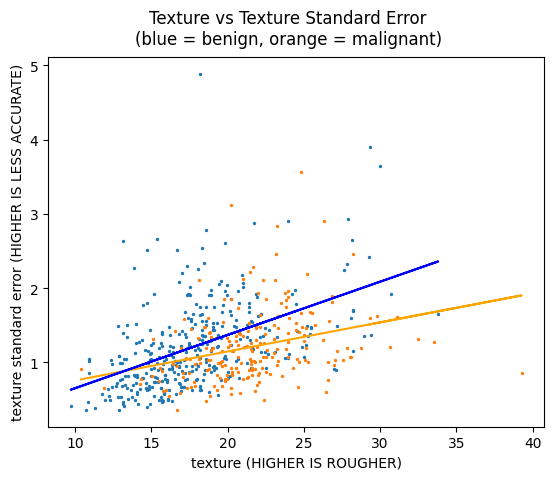

In [87]:
# q9
m_se_texture = malignant['texture_se'].mean()
b_se_texture = benign['texture_se'].mean()
print(f'malignant: {m_se_texture}')
print(f'benign: {b_se_texture}')

m1, b1 = np.polyfit(malignant['texture_mean'], malignant['texture_se'], deg = 1)
y1 = m1 * malignant['texture_mean'] + b1

m2, b2 = np.polyfit(benign['texture_mean'], benign['texture_se'], deg = 1)
y2= m2 * benign['texture_mean'] + b2

plt.scatter(x = benign['texture_mean'], 
            y = benign['texture_se'],s = 2)
plt.scatter(x = malignant['texture_mean'], 
            y = malignant['texture_se'],s=2)
plt.xlabel('texture (HIGHER IS ROUGHER)')
plt.ylabel('texture standard error (HIGHER IS LESS ACCURATE)')
plt.suptitle('Texture vs Texture Standard Error\n(blue = benign, orange = malignant)')
plt.plot(malignant['texture_mean'], y1, color = 'orange')
plt.plot(benign['texture_mean'], y2, color = 'blue')

malignant: 72.67240566037735
benign: 21.135148459383753


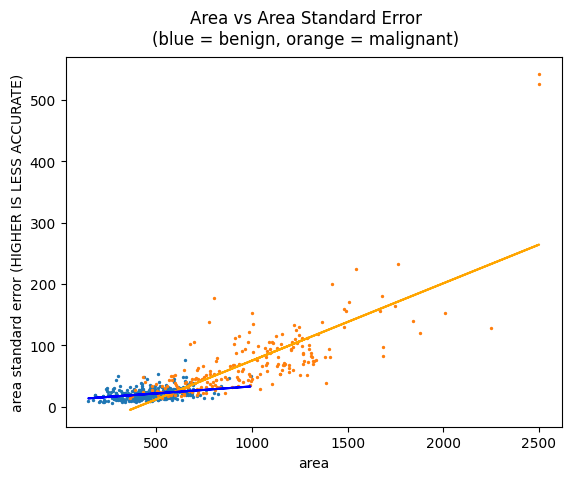

In [88]:
# q10
m_se_area = malignant['area_se'].mean()
b_se_area = benign['area_se'].mean()
print(f'malignant: {m_se_area}')
print(f'benign: {b_se_area}')

m1, b1 = np.polyfit(malignant['area_mean'], malignant['area_se'], deg = 1)
y1 = m1 * malignant['area_mean'] + b1

m2, b2 = np.polyfit(benign['area_mean'], benign['area_se'], deg = 1)
y2= m2 * benign['area_mean'] + b2

plt.scatter(x = benign['area_mean'], 
            y = benign['area_se'],s = 2)
plt.scatter(x = malignant['area_mean'], 
            y = malignant['area_se'],s=2)
plt.xlabel('area')
plt.ylabel('area standard error (HIGHER IS LESS ACCURATE)')
plt.suptitle('Area vs Area Standard Error\n(blue = benign, orange = malignant)')
plt.plot(malignant['area_mean'], y1, color = 'orange')
plt.plot(benign['area_mean'], y2, color = 'blue')

In [32]:
m_lowest_radius = malignant['radius_mean'].min()
b_lowest_radius = benign['radius_mean'].min()
print(f'malignant: {m_lowest_radius}, {m_mean_nucleus_radius}')
print(f'benign: {b_lowest_radius}, {b_mean_nucleus_radius}')

m_highest_radius = malignant['radius_worst'].max()
b_highest_radius = benign['radius_worst'].max()
print(f'malignant: {m_highest_radius}, {m_mean_nucleus_radius}')
print(f'benign: {b_highest_radius}, {b_mean_nucleus_radius}')

malignant: 10.95, 17.462830188679245
benign: 6.981, 12.146523809523808
malignant: 36.04, 17.462830188679245
benign: 19.82, 12.146523809523808
